# Task
Our task is simple, recognize handwritten digits. We will use MNIST dataset for this tutorial.


# Import necessary library
In this tutorial, we are going to use pytorch, the cutting-edge deep learning framework to complete our task.

In [1]:
import torch
import torchvision
!jupyter contrib nbextension install --user
!jupyter nbextension enable --py widgetsnbextension

[I 15:46:49 InstallContribNbextensionsApp] jupyter contrib nbextension install --user
[I 15:46:49 InstallContribNbextensionsApp] Installing jupyter_contrib_nbextensions nbextension files to jupyter data directory
[I 15:46:49 InstallContribNbextensionsApp] Installing /usr/local/lib/python3.8/dist-packages/jupyter_contrib_nbextensions/nbextensions/scratchpad -> scratchpad
[I 15:46:49 InstallContribNbextensionsApp] Making directory: /root/.local/share/jupyter/nbextensions/scratchpad/
[I 15:46:49 InstallContribNbextensionsApp] Copying: /usr/local/lib/python3.8/dist-packages/jupyter_contrib_nbextensions/nbextensions/scratchpad/LICENSE -> /root/.local/share/jupyter/nbextensions/scratchpad/LICENSE
[I 15:46:49 InstallContribNbextensionsApp] Copying: /usr/local/lib/python3.8/dist-packages/jupyter_contrib_nbextensions/nbextensions/scratchpad/README.md -> /root/.local/share/jupyter/nbextensions/scratchpad/README.md
[I 15:46:49 InstallContribNbextensionsApp] Copying: /usr/local/lib/python3.8/dist-

[I 15:46:49 InstallContribNbextensionsApp] Copying: /usr/local/lib/python3.8/dist-packages/jupyter_contrib_nbextensions/nbextensions/move_selected_cells/main.js -> /root/.local/share/jupyter/nbextensions/move_selected_cells/main.js
[I 15:46:49 InstallContribNbextensionsApp] - Validating: OK
[I 15:46:49 InstallContribNbextensionsApp] Installing /usr/local/lib/python3.8/dist-packages/jupyter_contrib_nbextensions/nbextensions/execution_dependencies -> execution_dependencies
[I 15:46:49 InstallContribNbextensionsApp] Making directory: /root/.local/share/jupyter/nbextensions/execution_dependencies/
[I 15:46:49 InstallContribNbextensionsApp] Copying: /usr/local/lib/python3.8/dist-packages/jupyter_contrib_nbextensions/nbextensions/execution_dependencies/execution_dependencies.js -> /root/.local/share/jupyter/nbextensions/execution_dependencies/execution_dependencies.js
[I 15:46:49 InstallContribNbextensionsApp] Copying: /usr/local/lib/python3.8/dist-packages/jupyter_contrib_nbextensions/nbext

[I 15:46:49 InstallContribNbextensionsApp] - Validating: OK
[I 15:46:49 InstallContribNbextensionsApp] Installing /usr/local/lib/python3.8/dist-packages/jupyter_contrib_nbextensions/nbextensions/exercise2 -> exercise2
[I 15:46:49 InstallContribNbextensionsApp] Making directory: /root/.local/share/jupyter/nbextensions/exercise2/
[I 15:46:49 InstallContribNbextensionsApp] Copying: /usr/local/lib/python3.8/dist-packages/jupyter_contrib_nbextensions/nbextensions/exercise2/main.css -> /root/.local/share/jupyter/nbextensions/exercise2/main.css
[I 15:46:49 InstallContribNbextensionsApp] Copying: /usr/local/lib/python3.8/dist-packages/jupyter_contrib_nbextensions/nbextensions/exercise2/main.js -> /root/.local/share/jupyter/nbextensions/exercise2/main.js
[I 15:46:49 InstallContribNbextensionsApp] Copying: /usr/local/lib/python3.8/dist-packages/jupyter_contrib_nbextensions/nbextensions/exercise2/readme.md -> /root/.local/share/jupyter/nbextensions/exercise2/readme.md
[I 15:46:49 InstallContribNb

Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: OK


In [2]:
import os
print(os.getcwd())

/usr/src/app/pytorch


In [3]:
## Create dataloader, in PyTorch, we feed the trainer data with use of dataloader
## We create dataloader with dataset from torchvision, 
## and we dont have to download it seperately, all automatically done

# Define batch size, batch size is how much data you feed for training in one iteration
batch_size_train = 64 # We use a small batch size here for training
batch_size_test = 1024 #

# define how image transformed
image_transform = torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize(
                                 (0.1307,), (0.3081,))
                             ])
#image datasets
train_dataset = torchvision.datasets.MNIST('/usr/src/app/data/training_data/mnist', 
                                           train=True, 
                                           download=True,
                                           transform=image_transform)
test_dataset = torchvision.datasets.MNIST('/usr/src/app/data/training_data/mnist', 
                                          train=False, 
                                          download=True,
                                          transform=image_transform)
#data loaders
train_loader = torch.utils.data.DataLoader(train_dataset,
                                           batch_size=batch_size_train, 
                                           shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset,
                                          batch_size=batch_size_test, 
                                          shuffle=True)

100%|████████████████████████████████████████████████████████████████████| 9912422/9912422 [00:01<00:00, 7194930.43it/s]


Extracting /usr/src/app/data/training_data/mnist/MNIST/raw/train-images-idx3-ubyte.gz to /usr/src/app/data/training_data/mnist/MNIST/raw



100%|███████████████████████████████████████████████████████████████████████| 28881/28881 [00:00<00:00, 36965423.81it/s]

Extracting /usr/src/app/data/training_data/mnist/MNIST/raw/train-labels-idx1-ubyte.gz to /usr/src/app/data/training_data/mnist/MNIST/raw




100%|███████████████████████████████████████████████████████████████████| 1648877/1648877 [00:00<00:00, 13284692.58it/s]


Extracting /usr/src/app/data/training_data/mnist/MNIST/raw/t10k-images-idx3-ubyte.gz to /usr/src/app/data/training_data/mnist/MNIST/raw



100%|███████████████████████████████████████████████████████████████████████████| 4542/4542 [00:00<00:00, 408170.22it/s]


Extracting /usr/src/app/data/training_data/mnist/MNIST/raw/t10k-labels-idx1-ubyte.gz to /usr/src/app/data/training_data/mnist/MNIST/raw



Label: tensor(2)


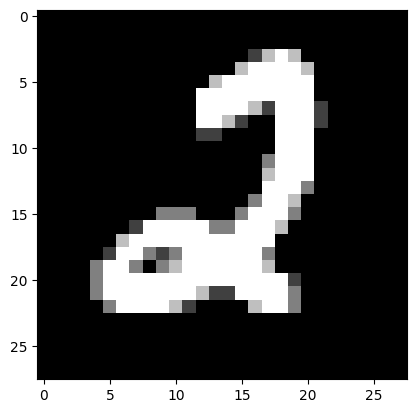

In [4]:
# import library
import matplotlib.pyplot as plt
# We can check the dataloader
_, (example_datas, labels) = next(enumerate(test_loader))
sample = example_datas[0][0]
# show the data
plt.imshow(sample, cmap='gray', interpolation='none')
print("Label: "+ str(labels[0]))

In [5]:
## Now we can start to build our CNN model
## We first import the pytorch nn module and optimizer
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
## Then define the model class
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        #input channel 1, output channel 10
        self.conv1 = nn.Conv2d(1, 10, kernel_size=5, stride=1)
        #input channel 10, output channel 20
        self.conv2 = nn.Conv2d(10, 20, kernel_size=5, stride=1)
        #dropout layer
        self.conv2_drop = nn.Dropout2d()
        #fully connected layer
        self.fc1 = nn.Linear(320, 50)
        self.fc2 = nn.Linear(50, 10)
    def forward(self, x):
        x = self.conv1(x)
        x = F.max_pool2d(x, 2)
        x = F.relu(x)
        x = self.conv2(x)
        x = self.conv2_drop(x)
        x = F.max_pool2d(x, 2)
        x = F.relu(x)
        x = x.view(-1, 320)
        x = self.fc1(x)
        x = F.relu(x)
        x = F.dropout(x)
        x = self.fc2(x)
        return F.log_softmax(x)

In [6]:
## create model and optimizer
learning_rate = 0.01
momentum = 0.5
device = "cpu"
model = CNN().to(device) #using cpu here
optimizer = optim.SGD(model.parameters(), lr=learning_rate,
                      momentum=momentum)

In [7]:
from tqdm import tqdm_notebook as tqdm
##define train function
def train(model, device, train_loader, optimizer, epoch, log_interval=10000):
    model.train()
    tk0 = tqdm(train_loader, total=int(len(train_loader)))
    counter = 0
    for batch_idx, (data, target) in enumerate(tk0):
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = F.nll_loss(output, target)
        loss.backward()
        optimizer.step()
        counter += 1
        tk0.set_postfix(loss=(loss.item()*data.size(0) / (counter * train_loader.batch_size)))
##define test function
def test(model, device, test_loader):
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            test_loss += F.nll_loss(output, target, reduction='sum').item() # sum up batch loss
            pred = output.argmax(dim=1, keepdim=True) # get the index of the max log-probability
            correct += pred.eq(target.view_as(pred)).sum().item()
    test_loss /= len(test_loader.dataset)

    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))

In [8]:
num_epoch = 3
for epoch in range(1, num_epoch + 1):
        train(model, device, train_loader, optimizer, epoch)
        test(model, device, test_loader)

/tmp/ipykernel_105/1895196525.py:5: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  tk0 = tqdm(train_loader, total=int(len(train_loader)))


  0%|          | 0/938 [00:00<?, ?it/s]

/tmp/ipykernel_105/4020281764.py:32: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)



Test set: Average loss: 0.2969, Accuracy: 9115/10000 (91%)



  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.2159, Accuracy: 9361/10000 (94%)



  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.1689, Accuracy: 9524/10000 (95%)



In [9]:
from torchinfo import summary
summary(model, (1, 28, 28))

/usr/local/lib/python3.8/dist-packages/torch/nn/functional.py:1338: UserWarning: dropout2d: Received a 3D input to dropout2d and assuming that channel-wise 1D dropout behavior is desired - input is interpreted as shape (N, C, L), where C is the channel dim. This behavior will change in a future release to interpret the input as one without a batch dimension, i.e. shape (C, H, W). To maintain the 1D channel-wise dropout behavior, please switch to using dropout1d instead.
  warnings.warn("dropout2d: Received a 3D input to dropout2d and assuming that channel-wise "
/tmp/ipykernel_105/4020281764.py:32: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)


Layer (type:depth-idx)                   Output Shape              Param #
CNN                                      [1, 10]                   --
├─Conv2d: 1-1                            [10, 24, 24]              260
├─Conv2d: 1-2                            [20, 8, 8]                5,020
├─Dropout2d: 1-3                         [20, 8, 8]                --
├─Linear: 1-4                            [1, 50]                   16,050
├─Linear: 1-5                            [1, 10]                   510
Total params: 21,840
Trainable params: 21,840
Non-trainable params: 0
Total mult-adds (M): 0.88
Input size (MB): 0.00
Forward/backward pass size (MB): 0.06
Params size (MB): 0.09
Estimated Total Size (MB): 0.15